<h1>Transistor as amplifier</h1>

<h2>Data in table</h2>

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import interpolate

In [126]:
Vin = 0.04
df = pd.read_csv('data.csv')

logf = np.log10(df['Frequency(Hz)'])
gain = 20 * np.log10(df['Output voltage(V)']/Vin)

df.insert(1, 'log f', logf)
df.insert(3, 'Voltage gain(dB)', gain)

In [127]:
df.head()

,Frequency(Hz),log f,Output voltage(V),Voltage gain(dB)
0,100,2.000000,0.16,12.041200
1,500,2.698970,0.48,21.583625
2,1000,3.000000,0.92,27.234557
3,2000,3.301030,1.70,32.567779
4,3000,3.477121,2.20,34.807254


<h2>Mid frequency gain and -3dB calculation</h2>

In [128]:
mid_gain = float(df['Voltage gain(dB)'].mode())
print(f"Mid frequency gain = {mid_gain:.3f}")
print(f"-3dB (half power) gain = {(mid_gain - 3):.3f}")

Mid frequency gain = 40.828
-3dB (half power) gain = 37.828


<h2>Plotting the bode plot</h2>
<h3>Cutoff frequencies:</h3>
<p>The cutoff frequencies are found by interpolation</p>

In [129]:
cutoff_freq = interpolate.InterpolatedUnivariateSpline(df['log f'], df['Voltage gain(dB)'] -(mid_gain - 3))
print(f"Cutoff frequencies are : {cutoff_freq.roots()}")

Cutoff frequencies are : [3.74499361 5.63755409]


<h3>Plot</h3>

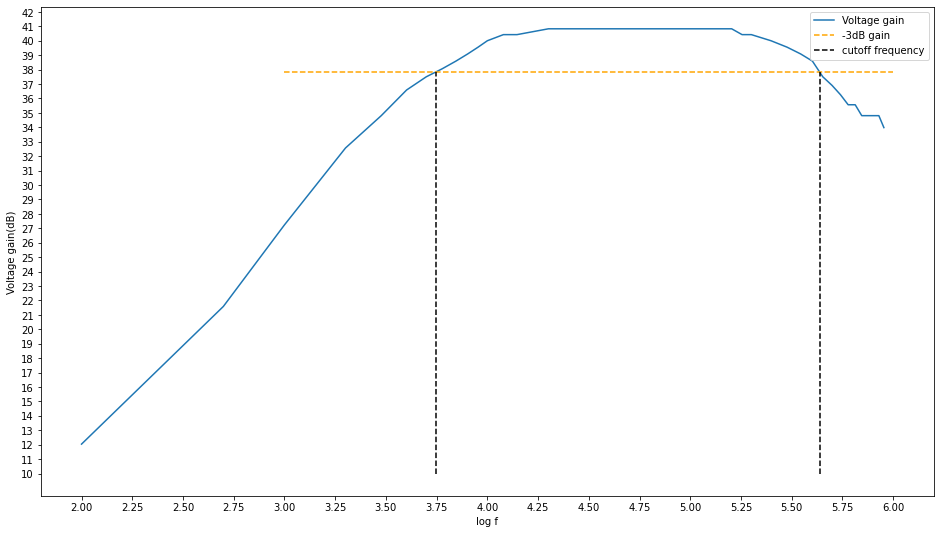

In [130]:
fig = plt.figure(facecolor=(1,1,1))
fig.set_figwidth(16)
fig.set_figheight(9)
x_scale = np.arange(2,6.25, 0.25)
y_scale = np.arange(10,45,1)

plt.xticks(x_scale)
plt.yticks(y_scale)

plt.plot(df['log f'], df['Voltage gain(dB)'], label = 'Voltage gain')
plt.hlines(mid_gain-3, 3, 6, colors='orange', label='-3dB gain',linestyles='dashed')
plt.vlines(cutoff_freq.roots(), 10, (mid_gain - 3), colors='black', label='cutoff frequency',linestyles='dashed')

plt.xlabel('log f')
plt.ylabel('Voltage gain(dB)')
plt.legend()
plt.show()